<a href="https://colab.research.google.com/github/Shrez7961/Fare-Price-Prediction/blob/main/Fare_Amount_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset “trips.csv” contains the following fields:


key - a unique identifier for each trip

fare_amount - the cost of each trip in usd

pickup_datetime - date and time when the meter was engaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged


– 
### **You need to analyse the data and create an efficient model that will estimate the fare prices accurately** 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing required modules and loading dataset
import numpy as np
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid",{'grid.linestyle': '--'})


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ALMABETTER/AlmaX Assignments/Mini Projects/trip.csv")

df.head(10)

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df2 = df.copy()

In [ ]:
df2.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df2 = df2[df2["fare_amount"]>0]

In [ ]:
df2.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999780e+05,199978.000000,199978.000000,199978.000000,199977.000000,199977.000000,199978.000000
mean,2.771229e+07,11.362649,-72.527851,39.935999,-72.526243,39.924410,1.684480
std,1.601400e+07,9.897079,11.437257,7.720443,13.115114,6.793438,1.385974
min,1.000000e+00,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382519e+07,6.000000,-73.992065,40.734795,-73.991407,40.733825,1.000000
50%,2.774518e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155540e+07,12.500000,-73.967155,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df2=df2[df2['passenger_count']<7]

In [ ]:
df2=df2.loc[(df2['pickup_longitude']>-180) & (df2['pickup_longitude']<180)]

In [ ]:
df2=df2.loc[(df2['pickup_latitude']>-90) & (df2['pickup_latitude']<90)]

In [ ]:
df2=df2.loc[(df2['dropoff_longitude']>-180) & (df2['dropoff_longitude']<180)]

In [ ]:
df2=df2.loc[(df2['dropoff_latitude']>-90) & (df2['dropoff_latitude']<90)]

In [ ]:
df2.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999640e+05,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000,199964.000000
mean,2.771259e+07,11.362542,-72.501989,39.918044,-72.512550,39.922546,1.683458
std,1.601405e+07,9.897195,10.449287,6.130108,10.408993,6.116060,1.306932
min,1.000000e+00,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000
25%,1.382528e+07,6.000000,-73.992065,40.734792,-73.991407,40.733825,1.000000
50%,2.774550e+07,8.500000,-73.981822,40.752590,-73.980092,40.753042,1.000000
75%,4.155571e+07,12.500000,-73.967155,40.767157,-73.963659,40.768000,2.000000
max,5.542357e+07,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000


In [ ]:
df2 = df2.dropna()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199964 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              199964 non-null  int64  
 1   key                199964 non-null  object 
 2   fare_amount        199964 non-null  float64
 3   pickup_datetime    199964 non-null  object 
 4   pickup_longitude   199964 non-null  float64
 5   pickup_latitude    199964 non-null  float64
 6   dropoff_longitude  199964 non-null  float64
 7   dropoff_latitude   199964 non-null  float64
 8   passenger_count    199964 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [ ]:
df2['pickup_datetime'] = df2['pickup_datetime'].apply(lambda x:dt.strptime(x, "%Y-%m-%d %H:%M:%S UTC"))
df2['time'] = df2['pickup_datetime'].dt.hour

In [ ]:
df2.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,19
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,20
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,21
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,8
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,17


In [ ]:
df2.columns

Index(['index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'time'],
      dtype='object')

In [ ]:

def find_distance(a,b,c,d):
  from geopy.distance import great_circle
  return great_circle((a,b), (c,d)).km


In [ ]:
#lets check whether our function to calculate distance is working or not
find_distance(40.744085,73.925023,40.761247,73.973082)

4.475456285278237

In [ ]:
from geopy import distance
# applies the distance function as described in the provided link
df2['distance_in_kms'] = df2.apply(lambda x: find_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

In [ ]:
df2.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,distance_in_kms
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,19,1.683325
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,20,2.457593
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,21,5.036384
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,8,1.661686
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,17,4.475456


As we have calculated the distance and time now we don't need index, key,pickup_datetime,	pickup_longitude,	pickup_latitude,	dropoff_longitude,	dropoff_latitude columns so we can delete that

In [ ]:
df2=df2.drop(['index', 'key','pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude' ], axis=1)

In [ ]:
df2.describe()

,fare_amount,passenger_count,time,distance_in_kms
count,199964.000000,199964.000000,199964.000000,199964.000000
mean,11.362542,1.683458,13.491653,20.475791
std,9.897195,1.306932,6.515340,378.657163
min,0.010000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,1.215337
50%,8.500000,1.000000,14.000000,2.120977
75%,12.500000,2.000000,19.000000,3.874819
max,499.000000,6.000000,23.000000,8782.911013


In [ ]:
df2.head()

,fare_amount,passenger_count,time,distance_in_kms
0,7.5,1,19,1.683325
1,7.7,1,20,2.457593
2,12.9,1,21,5.036384
3,5.3,3,8,1.661686
4,16.0,5,17,4.475456


In [ ]:
df2[df2["distance_in_kms"]>50]

,fare_amount,passenger_count,time,distance_in_kms
346,15.5,1,19,8666.410254
1067,52.0,1,22,8647.047814
1526,2.5,3,12,8666.784652
1945,7.0,1,16,6021.122795
2167,5.7,1,12,5941.068194
...,...,...,...,...
197863,7.0,1,22,8664.401359
198567,23.5,2,1,8665.759409
198665,20.1,5,21,4528.966080
199403,7.0,1,17,565.235381


In [ ]:
df2 = df2[df2["distance_in_kms"]<50]
df2.describe()

,fare_amount,passenger_count,time,distance_in_kms
count,199480.000000,199480.000000,199480.000000,199480.000000
mean,11.350273,1.683627,13.490961,3.255700
std,9.851985,1.306954,6.515964,3.586946
min,0.010000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,1.213256
50%,8.500000,1.000000,14.000000,2.115714
75%,12.500000,2.000000,19.000000,3.854684
max,499.000000,6.000000,23.000000,49.003800


## **EDA....**

In [ ]:
# Lets create a list of dependent and independent variable:
idv =['time','distance_in_kms','passenger_count']
dv = ['fare_amount']

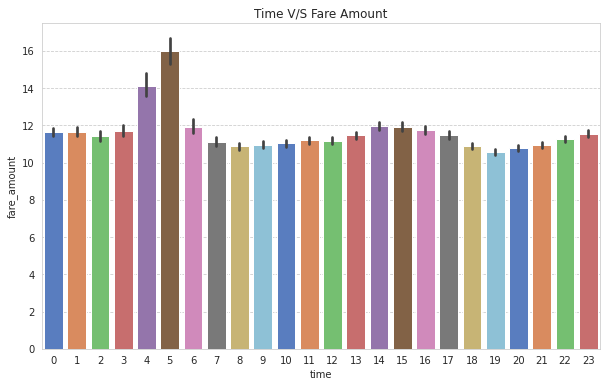

In [ ]:
#Plotting time vs fare amount
plt.figure(figsize=(10,6))
plt.title("Time V/S Fare Amount")
sns.barplot(x=df2.time,y= df2.fare_amount ,palette="muted") 
plt.show()

We can see here the fare amount in the morning 4 to 5 am is relatively high. That may be due to less availability of taxies.

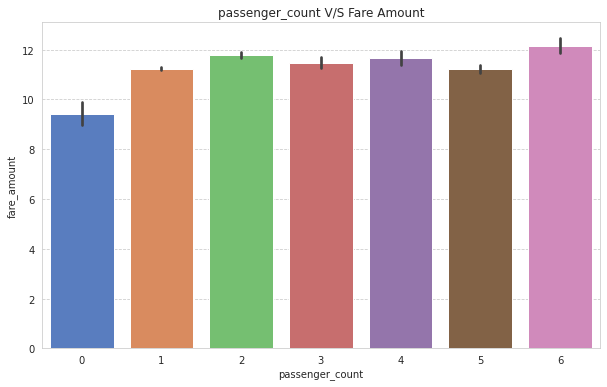

In [ ]:
#Plotting passenger_count vs fare amount
plt.figure(figsize=(10,6))
plt.title("passenger_count V/S Fare Amount")
sns.barplot(x=df2.passenger_count,y= df2.fare_amount ,palette="muted") 
plt.show()

Passenger count does not affect the fare price so we can drop this column

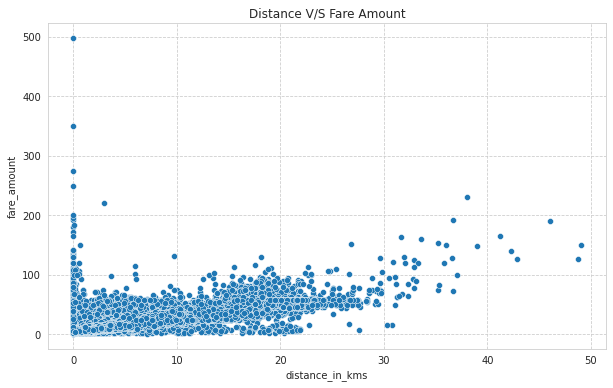

In [ ]:
#Plotting Distance vs fare amount
plt.figure(figsize=(10,6))
plt.title("Distance V/S Fare Amount")
sns.scatterplot(x=df2.distance_in_kms,y= df2.fare_amount ,palette="muted") 
plt.show()

We can see in abouve plot that there are many outliers which shows that fare price is upto 500 even for zero disctance so that can be cancelled up. We don't need fare amount values which is more than 250.

## **Feature Engineering**

In [ ]:
df2 = df2[df2["fare_amount"]<250]

In [ ]:
df2.describe()

,fare_amount,passenger_count,time,distance_in_kms
count,199476.000000,199476.000000,199476.000000,199476.000000
mean,11.343613,1.683631,13.491112,3.255766
std,9.729464,1.306961,6.515838,3.586952
min,0.010000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,1.213270
50%,8.500000,1.000000,14.000000,2.115790
75%,12.500000,2.000000,19.000000,3.854709
max,230.000000,6.000000,23.000000,49.003800


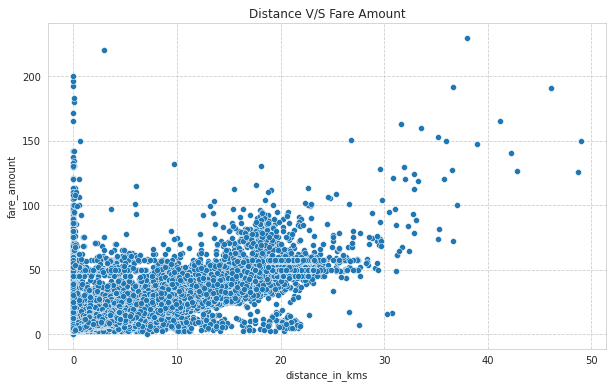

In [ ]:
#Plotting Distance vs fare amount
plt.figure(figsize=(10,6))
plt.title("Distance V/S Fare Amount")
sns.scatterplot(x=df2.distance_in_kms,y= df2.fare_amount ,palette="muted") 
plt.show()

In [ ]:
# Check the correlation plot

corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,fare_amount,passenger_count,time,distance_in_kms
fare_amount,1.000000,0.011771,-0.021439,0.843661
passenger_count,0.011771,1.000000,0.014702,0.009110
time,-0.021439,0.014702,1.000000,-0.031827
distance_in_kms,0.843661,0.009110,-0.031827,1.000000


In [ ]:
# Definig function for VIF

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df2[[i for i in idv]])

,variables,VIF
0,time,2.351243
1,distance_in_kms,1.609084
2,passenger_count,2.128208


In [ ]:
df_time=pd.get_dummies( df2['time'] ,prefix = 'time' )

In [ ]:
df2=df2.join([df_time])

In [ ]:
df2=df2.drop(['time','passenger_count'],axis=1)

In [ ]:
df2.head()

,fare_amount,distance_in_kms,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
0,7.5,1.683325,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,7.7,2.457593,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,12.9,5.036384,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5.3,1.661686,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,4.475456,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Create the data of dependent and independent variables

y = df2['fare_amount']
X = df2.drop(columns=['fare_amount'], axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)
print(X_train.shape)
print(X_test.shape)

(159580, 25)
(39896, 25)


In [ ]:
# Transforming data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regression**

Applying linear regression model to predict fare amount.

In [ ]:
# Fitting onto Linear regression Model 

reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# Getting the X_train and X-test value

y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

Evaluation Matrix for Linear Regression

In [ ]:
# Calculate MSE, MAE, R2 for training data


MSEl = mean_squared_error((y_train), (y_pred_train))
MAEl= mean_absolute_error(y_train, y_pred_train)
r2l = r2_score(y_train, y_pred_train)

In [ ]:
# Calculate MSE, MAE, R2 for testing data


MSEtestl = mean_squared_error((y_test), (y_pred_test))
MAEtestl= mean_absolute_error(y_test, y_pred_test)
r2testl = r2_score(y_test, y_pred_test)

In [ ]:
# Printing Errors

print('Training Errors\nMSE:', MSEl , '\nMAE:' , MAEl , '\nR2:',round((r2l),3))
print('\n\nTesting Errors\nMSE:', MSEtestl , '\nMAE:' , MAEtestl , '\nR2:',round((r2testl),3))

Training Errors
MSE: 27.19582608570605 
MAE: 2.5313484708272305 
R2: 0.712


Testing Errors
MSE: 26.18839733243257 
MAE: 2.53809120387813 
R2: 0.726


## **Polynomial Regression**

In [ ]:
# Fitting training data onto Polynomial regression Model 

poly_reg = PolynomialFeatures(degree = 2)

In [ ]:
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

In [ ]:
# Fitting training data onto Polynomial regression Model 

poly = LinearRegression().fit(X_poly, y_train)

In [ ]:
# Getting the y_train and y-test value

y_pred_poly_train = poly.predict(X_poly)
y_pred_poly_test= poly.predict(X_poly_test)

Evaluation Matrix for Polynomial Regression

In [ ]:
# Calculate MSE, MAE, R2 for training data

MSEp = mean_squared_error((y_train), (y_pred_poly_train))
MAEp= mean_absolute_error(y_train, y_pred_poly_train)
r2p = r2_score(y_train, y_pred_poly_train)

In [ ]:
# Calculate MSE, MAE, R2 for testing data

MSEtestp = mean_squared_error((y_test), (y_pred_poly_test))
MAEtestp= mean_absolute_error(y_test, y_pred_poly_test)
r2testp = r2_score(y_test, y_pred_poly_test)

In [ ]:
# Printing Errors

print('Training Errors\nMSE:', MSEp , '\nMAE:' , MAEp , '\nR2:',round((r2p),2))
print('\n\nTesting Errors\nMSE:', MSEtestp , '\nMAE:' , MAEtestp , '\nR2:',round((r2testp),2))

Training Errors
MSE: 26.769149624539164 
MAE: 2.5372960652572383 
R2: 0.72


Testing Errors
MSE: 25.64599423303629 
MAE: 2.5421872141004114 
R2: 0.73


## **Random Forrest Regressor**

In [ ]:
rfc = RandomForestRegressor(n_estimators = 180, random_state = 21 ,criterion= 'mse',max_depth=13 ,max_leaf_nodes= 50)
rfc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=13, max_leaf_nodes=50,
                      n_estimators=180, random_state=21)

In [ ]:
# Prediction on  train dataset

y_pred_trainrfc = rfc.predict(X_train)

In [ ]:
#Prediction  on  test dataset

y_pred_testrfc = rfc.predict(X_test)

## **Evaluation Matrix for Random Forest**

In [ ]:
# Calculate MSE, MAE, R2 for training data


MSErfc = mean_squared_error(y_train, y_pred_trainrfc)
MAErfc = mean_absolute_error(y_train, y_pred_trainrfc)
r2rfc = r2_score(y_train, y_pred_trainrfc)

In [ ]:

# Calculate MSE, MAE, R2 for testing data


MSEtestrf = mean_squared_error((y_test), (y_pred_testrfc))
MAEtestrf = mean_absolute_error(y_test, y_pred_testrfc)
r2testrf = r2_score(y_test, y_pred_testrfc)

In [ ]:
# Printing Errors

print('Training Errors\nMSE:', MSErfc , '\nMAE:' , MAErfc , '\nR2:',round((r2rfc),3))
print('\n\nTesting Errors\nMSE:', MSEtestrf , '\nMAE:' , MAEtestrf , '\nR2:',round((r2testrf),3))

Training Errors
MSE: 22.710221514419867 
MAE: 2.4339075861587443 
R2: 0.759


Testing Errors
MSE: 23.258089158241116 
MAE: 2.454404035871036 
R2: 0.757
